# Lists estimates of the percentage of body fat determined by underwater weighing and various body circumference measurements for men.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bf = pd.read_csv(r"C:\Users\Abhinandan\Desktop\DataSet\bodyfat.csv")


In [3]:
bf.dtypes

Bodyfat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Ankle      float64
Biceps     float64
Wrist      float64
dtype: object

In [14]:
bf.shape

(100, 10)

In [6]:
bf

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,32.3,41,247.25,73.50,42.1,117.0,115.6,26.3,37.3,19.7
1,22.5,31,177.25,71.50,36.2,101.1,92.4,24.6,30.1,18.2
2,22.0,42,156.25,69.00,35.5,97.8,86.0,24.0,31.2,17.4
3,12.3,23,154.25,67.75,36.2,93.1,85.2,21.9,32.0,17.1
4,20.5,46,177.00,70.00,37.2,99.7,95.6,22.5,29.1,17.7
...,...,...,...,...,...,...,...,...,...,...
95,20.1,48,177.25,72.75,36.8,96.0,90.0,22.8,29.9,18.1
96,29.4,43,187.75,74.00,37.7,97.8,98.6,23.8,34.3,17.7
97,13.0,33,184.25,68.75,40.7,98.9,92.1,23.5,33.5,19.7
98,25.2,26,223.00,70.25,40.6,114.1,106.8,24.7,36.0,18.4


In [7]:
bf.isnull().sum()

Bodyfat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Ankle      0
Biceps     0
Wrist      0
dtype: int64

In [8]:
bf.dtypes

Bodyfat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Ankle      float64
Biceps     float64
Wrist      float64
dtype: object

In [9]:
from sklearn.model_selection import train_test_split
bf_train , bf_test = train_test_split (bf, test_size= .2)

In [10]:
bf_train_x =bf_train.iloc[:, 1:]
bf_train_y =bf_train.iloc[:, 0]

In [11]:
bf_test_x =bf_test.iloc[:, 1:]
bf_test_y =bf_test.iloc[:, 0]

In [12]:
print(bf_train_x.shape)
print(bf_train_y.shape)
print("---------------")
print(bf_test_x.shape)
print(bf_test_y.shape)

(80, 9)
(80,)
---------------
(20, 9)
(20,)


In [10]:
# model building

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [12]:
lin_reg.fit(bf_train_x , bf_train_y)   # model is created

LinearRegression()

In [13]:
# pred train
# pred test

In [14]:
pred_train = lin_reg.predict(bf_train_x)
pred_test  = lin_reg.predict(bf_test_x)

In [15]:
Rsquare = lin_reg.score(bf_train_x , bf_train_y)
Rsquare

0.7355090182326336

In [16]:
N = bf_train_x.shape[0]  # rows
K = bf_train_x.shape[1]  # variables

In [17]:
Adj_Rsquare = 1-( (1 - Rsquare) * (N - 1) / (N - K - 1 ))

Adj_Rsquare

0.7015030348625436

In [18]:
lin_reg.coef_

array([ 0.07565331, -0.06674297, -0.0838098 ,  0.16182469, -0.06707415,
        0.96135499,  0.16626874,  0.07728015, -2.30719003])

In [19]:
lin_reg.intercept_

-19.267837883477977

In [20]:
error_train = bf_train_y - pred_train
error_test  = bf_test_y  - pred_test

In [21]:
SSE = np.sum(np.square(error_train))
SSE

1336.49356116708

In [22]:
err_wid_mean = bf_train_y.mean() - pred_train

In [23]:
SSR = np.sum(np.square(err_wid_mean))
SSR

3716.584438832928

In [24]:
rquare = SSR /(SSR +SSE)
rquare

0.735509018232634

In [25]:
np.mean(error_train)  #   IT SHOLUD BE ZERO (0)

2.7422508708241366e-15

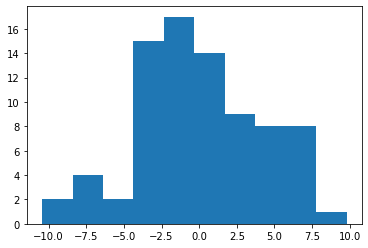

In [26]:
plt.hist(error_train);

C:\Users\Abhinandan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bodyfat', ylabel='Density'>

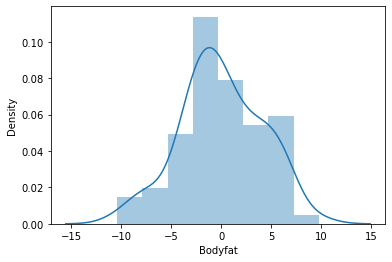

In [27]:
sns.distplot(error_train)

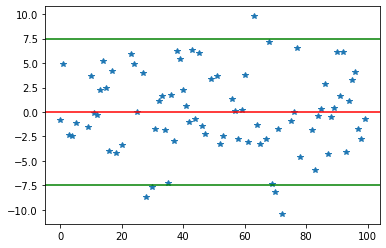

In [28]:
plt.plot(error_train, "*")
plt.axhline(y=np.mean(error_train), color ="r")
plt.axhline(y= 7.5, color="g")
plt.axhline(y=-7.5, color="g")


# scatter plot

In [29]:
actual_pred = pd.DataFrame({"pred":pred_train , "actual": bf_train_y})
actual_pred

,pred,actual
88,14.363131,13.8
36,9.676947,11.4
0,33.073282,32.3
42,20.671481,19.6
61,16.672750,13.6
...,...,...
76,18.238267,18.2
97,14.707388,13.0
11,20.507725,20.4
49,17.165653,20.5


<AxesSubplot:xlabel='actual', ylabel='pred'>

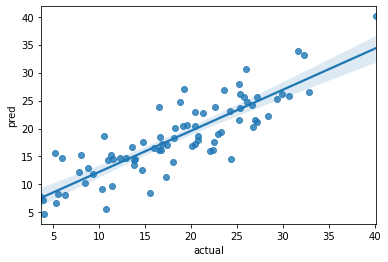

In [30]:
sns.regplot(x= "actual" , y= "pred", data= actual_pred)

In [31]:
# Lets find MAE, MSE, MAPE, RMSE

In [32]:
MAE = np.mean(np.abs(error_test))
MAE

2.8118425562990117

In [33]:
MSE = np.mean(np.square(error_test))
MSE

11.482224090298844

In [34]:
RMSE = np.sqrt(MSE)
RMSE

3.3885430630728073

In [35]:
MAPE= np.mean(np.abs(error_test *100 /bf_test_y))
MAPE

18.27026253653359

In [36]:
Acc = np.round(100- MAPE)
Acc

82.0